In [19]:
import re
import csv
import psutil
import matplotlib.pyplot as plt
import time
import numpy as np

In [20]:
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

<IPython.core.display.Javascript object>


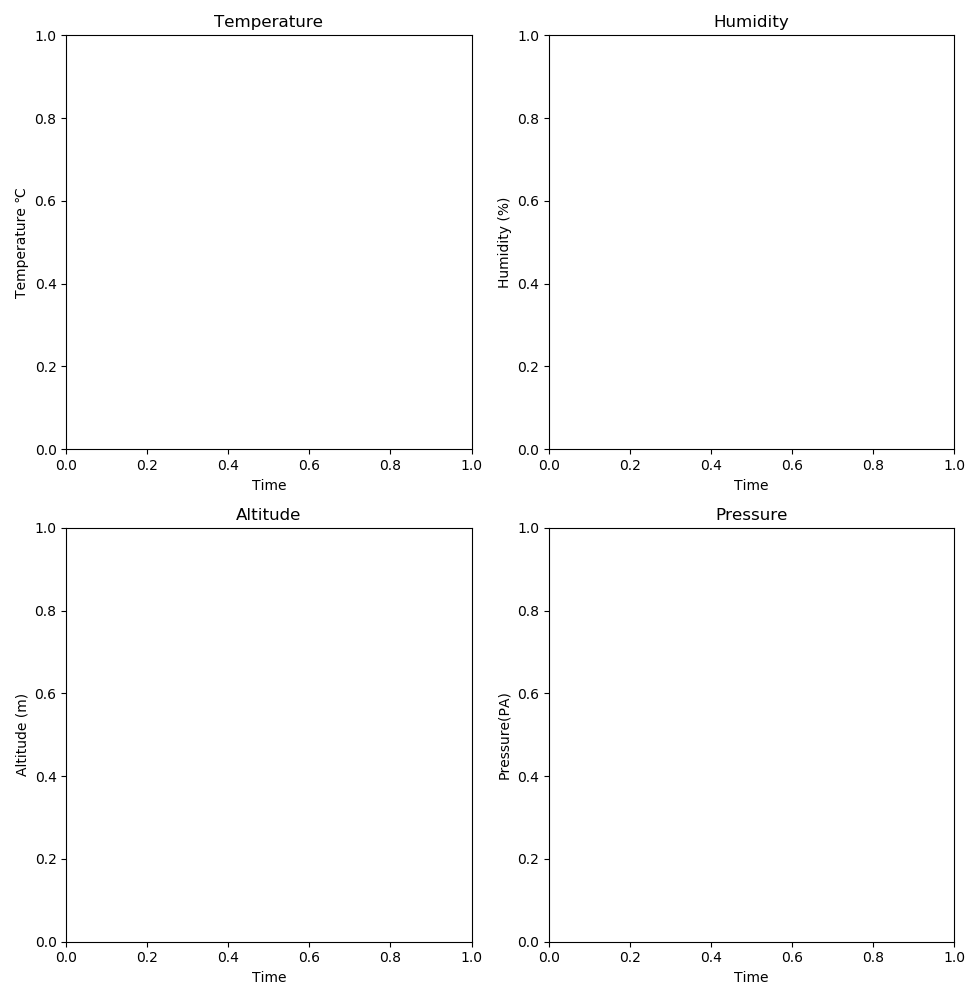

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9.8, 10))

axes[0, 0].set_title("Temperature")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Temperature ℃")

axes[0, 1].set_title("Humidity")
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Humidity (%)")

axes[1, 0].set_title("Altitude")
axes[1, 0].set_xlabel("Time")
axes[1, 0].set_ylabel("Altitude (m)")

axes[1, 1].set_title("Pressure")
axes[1, 1].set_xlabel("Time")
axes[1, 1].set_ylabel("Pressure(PA)")


#axes[0, 1].remove()

fig.tight_layout()
plt.show()


In [22]:
import serial

arduino2 = serial.Serial('COM5',115200) 
Temperature1 = []
Humidity1 = []
Altitude1 = []
Pressure1 = []
Temperature2 = []
Humidity2 = []
Altitude2 = []
Pressure2 = []
X = []
i = 1;
Cansat1 = ""
Cansat2 = ""

from OpenGL.GL import *
from OpenGL.GLU import *
import pygame
from pygame.locals import *
import serial
yaw_mode = False
video_flags = OPENGL|DOUBLEBUF
    
pygame.init()
screen = pygame.display.set_mode((640,480), video_flags)
pygame.display.set_caption("Press Esc to quit, z toggles yaw mode")
glViewport(0, 0, 640, 480)
glMatrixMode(GL_PROJECTION)
glLoadIdentity()
gluPerspective(45, 1.0*640/480, 0.1, 100.0)
glMatrixMode(GL_MODELVIEW)
glLoadIdentity()
ax = 1
ay = 1
az =1
glShadeModel(GL_SMOOTH)
glClearColor(0.0, 0.0, 0.0, 0.0)
glClearDepth(1.0)
glEnable(GL_DEPTH_TEST)
glDepthFunc(GL_LEQUAL)
glHint(GL_PERSPECTIVE_CORRECTION_HINT, GL_NICEST)
frames = 0
ticks = pygame.time.get_ticks()

SerialException: could not open port 'COM3': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)

In [ ]:
event = pygame.event.poll()
                if event.type == QUIT or (event.type == KEYDOWN and event.key == K_ESCAPE):
                    pygame.quit()  #* quit pygame properly
                    break       
                if event.type == KEYDOWN and event.key == K_z:
                    yaw_mode = not yaw_mode


                glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT);	

                glLoadIdentity()
                glTranslatef(0,0.0,-7.0)

                osd_text = "pitch: " + str("{0:.2f}".format(pitch)) + ", roll: " + str("{0:.2f}".format(roll))

                if yaw_mode:
                    osd_line = osd_text + ", yaw: " + str("{0:.2f}".format(az))
                else:
                    osd_line = osd_text

                position = (-2,-2, 2)
                font = pygame.font.SysFont ("Courier", 18, True)
                textSurface = font.render(osd_line, True, (255,255,255,255), (0,0,0,255))     
                textData = pygame.image.tostring(textSurface, "RGBA", True)     
                glRasterPos3d(*position)     
                glDrawPixels(textSurface.get_width(), textSurface.get_height(), GL_RGBA, GL_UNSIGNED_BYTE, textData)

                # the way I'm holding the IMU board, X and Y axis are switched 
                # with respect to the OpenGL coordinate system
                if yaw_mode:                             # experimental
                    glRotatef(0.0, 0.0, 1.0, 0.0)  # Yaw,   rotate around y-axis
                else:
                    glRotatef(0.0, 0.0, 1.0, 0.0)
                glRotatef(pitch,1.0,0.0,0.0)        # Pitch, rotate around x-axis
                glRotatef(-1*roll ,0.0,0.0,1.0)     # Roll,  rotate around z-axis

                glBegin(GL_QUADS)	
                glColor3f(0.0,1.0,0.0)
                glVertex3f( 1.0, 0.2,-1.0)
                glVertex3f(-1.0, 0.2,-1.0)		
                glVertex3f(-1.0, 0.2, 1.0)		
                glVertex3f( 1.0, 0.2, 1.0)		

                glColor3f(1.0,0.5,0.0)	
                glVertex3f( 1.0,-0.2, 1.0)
                glVertex3f(-1.0,-0.2, 1.0)		
                glVertex3f(-1.0,-0.2,-1.0)		
                glVertex3f( 1.0,-0.2,-1.0)		

                glColor3f(1.0,0.0,0.0)		
                glVertex3f( 1.0, 0.2, 1.0)
                glVertex3f(-1.0, 0.2, 1.0)		
                glVertex3f(-1.0,-0.2, 1.0)		
                glVertex3f( 1.0,-0.2, 1.0)		

                glColor3f(1.0,1.0,0.0)	
                glVertex3f( 1.0,-0.2,-1.0)
                glVertex3f(-1.0,-0.2,-1.0)
                glVertex3f(-1.0, 0.2,-1.0)		
                glVertex3f( 1.0, 0.2,-1.0)		

                glColor3f(0.0,0.0,1.0)	
                glVertex3f(-1.0, 0.2, 1.0)
                glVertex3f(-1.0, 0.2,-1.0)		
                glVertex3f(-1.0,-0.2,-1.0)		
                glVertex3f(-1.0,-0.2, 1.0)		

                glColor3f(1.0,0.0,1.0)	
                glVertex3f( 1.0, 0.2,-1.0)
                glVertex3f( 1.0, 0.2, 1.0)
                glVertex3f( 1.0,-0.2, 1.0)		
                glVertex3f( 1.0,-0.2,-1.0)		
                glEnd()	

In [ ]:
import re
import csv
import psutil
import matplotlib.pyplot as plt
import time
import numpy as np
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9.8, 10))

axes[0, 0].set_title("Temperature")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Temperature ℃")

axes[0, 1].set_title("Humidity")
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Humidity (%)")

axes[1, 0].set_title("Altitude")
axes[1, 0].set_xlabel("Time")
axes[1, 0].set_ylabel("Altitude (m)")

axes[1, 1].set_title("Pressure")
axes[1, 1].set_xlabel("Time")
axes[1, 1].set_ylabel("Pressure(PA)")


#axes[0, 1].remove()

fig.tight_layout()
plt.show()

In [ ]:
import serial

arduino1 = serial.Serial('COM5',115200) 
Temperature1 = []
Humidity1 = []
Altitude1 = []
Pressure1 = []
e1 = []
X = []
i = 1;
Cansat1 = ""

from OpenGL.GL import *
from OpenGL.GLU import *
import pygame
from pygame.locals import *
import serial
yaw_mode = False
video_flags = OPENGL|DOUBLEBUF
    
pygame.init()
screen = pygame.display.set_mode((640,480), video_flags)
pygame.display.set_caption("Press Esc to quit, z toggles yaw mode")
glViewport(0, 0, 640, 480)
glMatrixMode(GL_PROJECTION)
glLoadIdentity()
gluPerspective(45, 1.0*640/480, 0.1, 100.0)
glMatrixMode(GL_MODELVIEW)
glLoadIdentity()
glShadeModel(GL_SMOOTH)
glClearColor(0.0, 0.0, 0.0, 0.0)
glClearDepth(1.0)
glEnable(GL_DEPTH_TEST)
glDepthFunc(GL_LEQUAL)
glHint(GL_PERSPECTIVE_CORRECTION_HINT, GL_NICEST)
frames = 0
ticks = pygame.time.get_ticks()

In [ ]:
while(1):
    try:
        s1 = str(arduino1.readline())
        s1 = s1.replace('b', '').replace('\\', '').replace('r','').replace('n','').replace('\'','')
        s1 = s1.replace(' ',',')
        data_file = open("data_file111.csv","a")
        data_file.write(s1)
        data_file.write("\n")
        data_file.close() 
        rawdata1  = re.split(',', s1)
        print(rawdata1)
      
        try:
            lat1 = float(rawdata1[1])
            lon1 = float(rawdata1[2])
            temp1 = float(rawdata1[3])
            press1 = float(rawdata1[4])
            alti1 = float(rawdata1[5])
            humi1 = float(rawdata1[6])
            roll1 = float(rawdata1[7])
            pitch1 = float(rawdata1[8])
            
            
            if not((temp1<21) and (press1<50000) and (alti1 > 2000) ):
                Temperature1.append(temp1)
                Pressure1.append(press1)
                Humidity1.append(humi1)
                Altitude1.append(alti1)
                X.append(i)
                i+=1 
                axes[0, 0].plot(X,Temperature1, color='r')
                axes[0, 1].plot(X,Humidity1, color='b')
                axes[1, 0].plot(X,Altitude1, color='g')
                axes[1, 1].plot(X,Pressure1, color='y')
                fig.canvas.draw()
                
            if (lat1>=12 and lat1<=17) and (lon1>=90 and lon1 <=111):
                Cansat1+=str(lon1)+","+str(lat1)+","+str(alti1)+" "

            with open ("position1.kml","w") as pos:
                    pos.write("""<?xml version="1.0" encoding="UTF-8"?>
            <kml xmlns="http://www.opengis.net/kml/2.2">
              <Document>
                <name>Paths</name>
                <description>Examples of paths. Note that the tessellate tag is by default
                  set to 0. If you want to create tessellated lines, they must be authored
                  (or edited) directly in KML.</description>

                <Style id="yellowLineGreenPoly">
                  <LineStyle>
                    <color>7f00ffff</color>
                    <width>4</width>
                  </LineStyle>
                  <PolyStyle>
                    <color>5014F00A</color>
                  </PolyStyle>
                </Style>

                <Style id="blueLineGreenPoly">
                  <LineStyle>
                    <color>50F00A14</color>
                    <width>4</width>
                  </LineStyle>
                  <PolyStyle>
                    <color>50F00A14</color>
                  </PolyStyle>
                </Style>

                <Placemark>
                  <name>Cansat1</name>
                  
                  <styleUrl>#yellowLineGreenPoly</styleUrl>
                  <LineString>
                    <extrude>1</extrude>
                    <tessellate>1</tessellate>
                    <altitudeMode>absolute</altitudeMode>
                    <coordinates> %s
                    </coordinates>
                  </LineString>
                </Placemark>
              </Document>
            </kml>""" % (Cansat1))
                
            Cansat1+= " "
            time.sleep(0.5)
        except :
            continue      
    except :
        arduino1 = serial.Serial('COM5',115200) 
        time.sleep(1)
        continue
    if (isinstance(pitch1, float)) and (isinstance(roll1, float)):
        event = pygame.event.poll()
        if event.type == QUIT or (event.type == KEYDOWN and event.key == K_ESCAPE):
            pygame.quit()  #* quit pygame properly
            break       
        if event.type == KEYDOWN and event.key == K_z:
            yaw_mode = not yaw_mode


        glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT);	

        glLoadIdentity()
        glTranslatef(0,0.0,-7.0)

        osd_text = "pitch: " + str("{0:.2f}".format(pitch1)) + ", roll: " + str("{0:.2f}".format(roll1))

        if yaw_mode:
            osd_line = osd_text + ", yaw: " + str("{0:.2f}".format(az))
        else:
            osd_line = osd_text

        position = (-2,-2, 2)
        font = pygame.font.SysFont ("Courier", 18, True)
        textSurface = font.render(osd_line, True, (255,255,255,255), (0,0,0,255))     
        textData = pygame.image.tostring(textSurface, "RGBA", True)     
        glRasterPos3d(*position)     
        glDrawPixels(textSurface.get_width(), textSurface.get_height(), GL_RGBA, GL_UNSIGNED_BYTE, textData)

        # the way I'm holding the IMU board, X and Y axis are switched 
        # with respect to the OpenGL coordinate system
       
        if yaw_mode:                             # experimental
            glRotatef(az, 0.0, 1.0, 0.0)  # Yaw,   rotate around y-axis
        else:
            glRotatef(0.0, 0.0, 1.0, 0.0)
        glRotatef(pitch1 ,1.0,0.0,0.0)        # Pitch, rotate around x-axis
        glRotatef(1*roll1 ,0.0,0.0,1.0)     # Roll,  rotate around z-axis

        glBegin(GL_QUADS)	
        glColor3f(0.0,1.0,0.0)
        glVertex3f( 1.0, 0.2,-1.0)
        glVertex3f(-1.0, 0.2,-1.0)		
        glVertex3f(-1.0, 0.2, 1.0)		
        glVertex3f( 1.0, 0.2, 1.0)		

        glColor3f(1.0,0.5,0.0)	
        glVertex3f( 1.0,-0.2, 1.0)
        glVertex3f(-1.0,-0.2, 1.0)		
        glVertex3f(-1.0,-0.2,-1.0)		
        glVertex3f( 1.0,-0.2,-1.0)		

        glColor3f(1.0,0.0,0.0)		
        glVertex3f( 1.0, 0.2, 1.0)
        glVertex3f(-1.0, 0.2, 1.0)		
        glVertex3f(-1.0,-0.2, 1.0)		
        glVertex3f( 1.0,-0.2, 1.0)		

        glColor3f(1.0,1.0,0.0)	
        glVertex3f( 1.0,-0.2,-1.0)
        glVertex3f(-1.0,-0.2,-1.0)
        glVertex3f(-1.0, 0.2,-1.0)		
        glVertex3f( 1.0, 0.2,-1.0)		

        glColor3f(0.0,0.0,1.0)	
        glVertex3f(-1.0, 0.2, 1.0)
        glVertex3f(-1.0, 0.2,-1.0)		
        glVertex3f(-1.0,-0.2,-1.0)		
        glVertex3f(-1.0,-0.2, 1.0)		

        glColor3f(1.0,0.0,1.0)	
        glVertex3f( 1.0, 0.2,-1.0)
        glVertex3f( 1.0, 0.2, 1.0)
        glVertex3f( 1.0,-0.2, 1.0)		
        glVertex3f( 1.0,-0.2,-1.0)		
        glEnd()	

        pygame.display.flip()
        frames = frames+1
print ("fps:  %d" % ((frames*1000)/(pygame.time.get_ticks()-ticks)))
